<a href="https://colab.research.google.com/github/ShedovaNastya/design-workshop/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT MODULE

In [ ]:
import torch
import os
from IPython.display import clear_output
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.models import list_models, get_model
from tqdm.notebook import tqdm as bar
from copy import deepcopy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/celebA_train_500.zip
clear_output()

#DATASET

In [ ]:
class FaceDataset(torch.utils.data.Dataset):

    def __init__(self, images_folder, label_folder, sample_folder, type_dataset, transform):
      """
      image_folder: путь до папки с изображениями
      label_folder: путь до файла, где какой человек находится
      sample_folder: путь до файла к какому датасету относится конкретное изображение
      type_dataset: датасет, который нас сейчас интересует
      transform: преобразование изображения
      """
      self.images_folder = images_folder
      self.label_folder = label_folder
      self.sample_folder = sample_folder
      self.type_dataset = type_dataset
      self.transform = transform


      with open(self.label_folder, 'r') as file: #человек
        self.labels = {}
        for i in file.readlines():
          key, value = i.split()
          self.labels[key] = int(value)

      with open(self.sample_folder, 'r') as file: #классификация датасетов
        self.samples = {}
        for i in file.readlines():
          key, value = i.split()
          self.samples[key] = int(value)

      self.files = [i for i in os.listdir(self.images_folder) if self.samples.get(i, 5) == self.type_dataset]

    def __len__(self):
      return len(self.files)

    def __getitem__(self, idx):
      image_name = self.images_folder + self.files[idx]
      image = np.array(Image.open(image_name))
      image = Image.fromarray(image[77:-41,45:-50])
      label = int(self.labels[self.files[idx]])
      image = self.transform(image)
      return image, label




In [ ]:
train_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            0,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))
val_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            1,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))
test_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            2,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 30, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 30, shuffle = False)

In [ ]:
list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [ ]:
m1 = get_model("efficientnet_b0", weights="IMAGENET1K_V1")
m1

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 100MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
m1.classifier[1] = torch.nn.Linear(in_features=1280, out_features=500, bias=True)

#MODEL 1 EfficientNet_B0_Weights.IMAGENET1K_V1

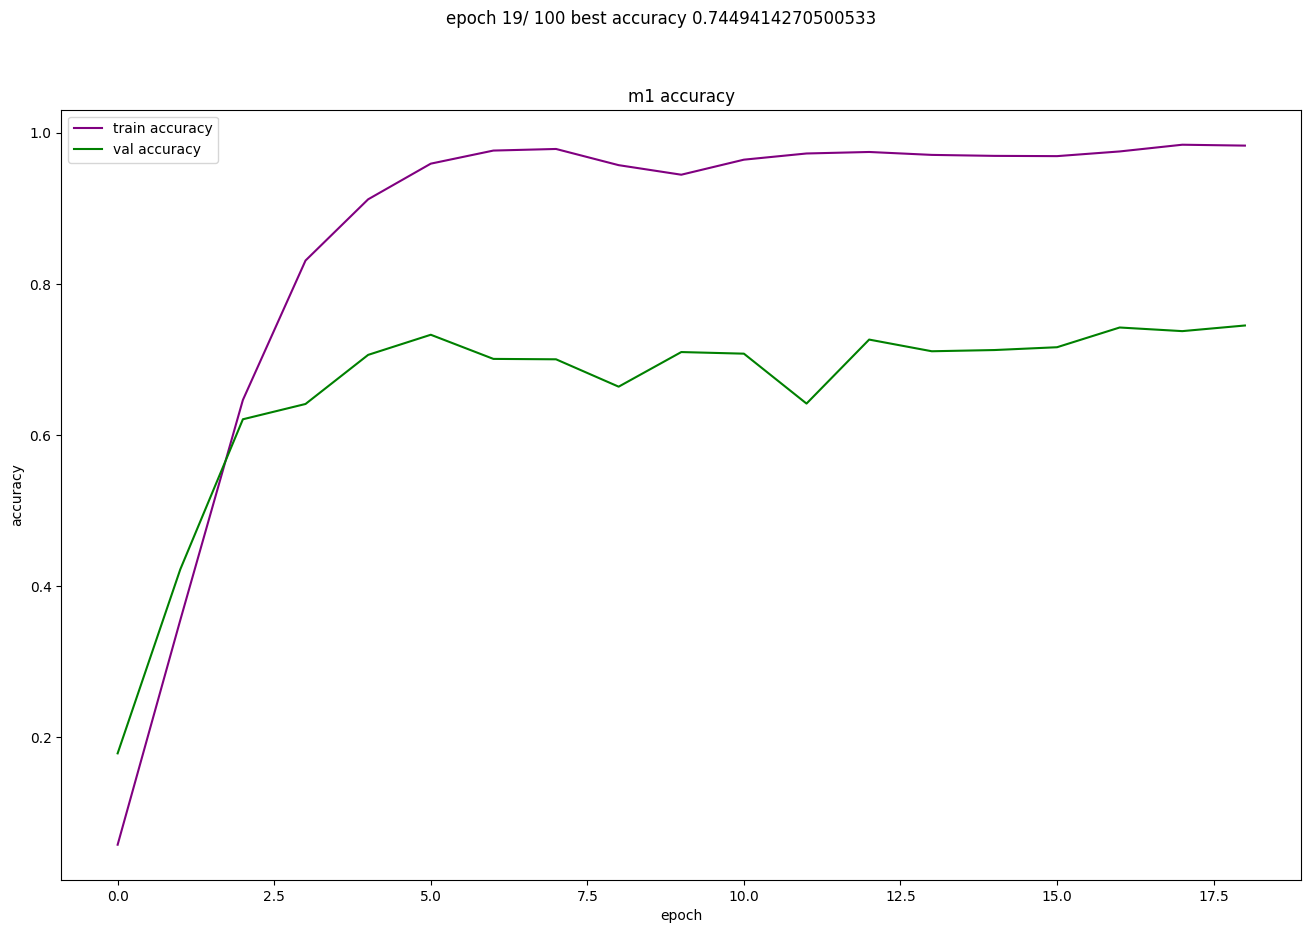

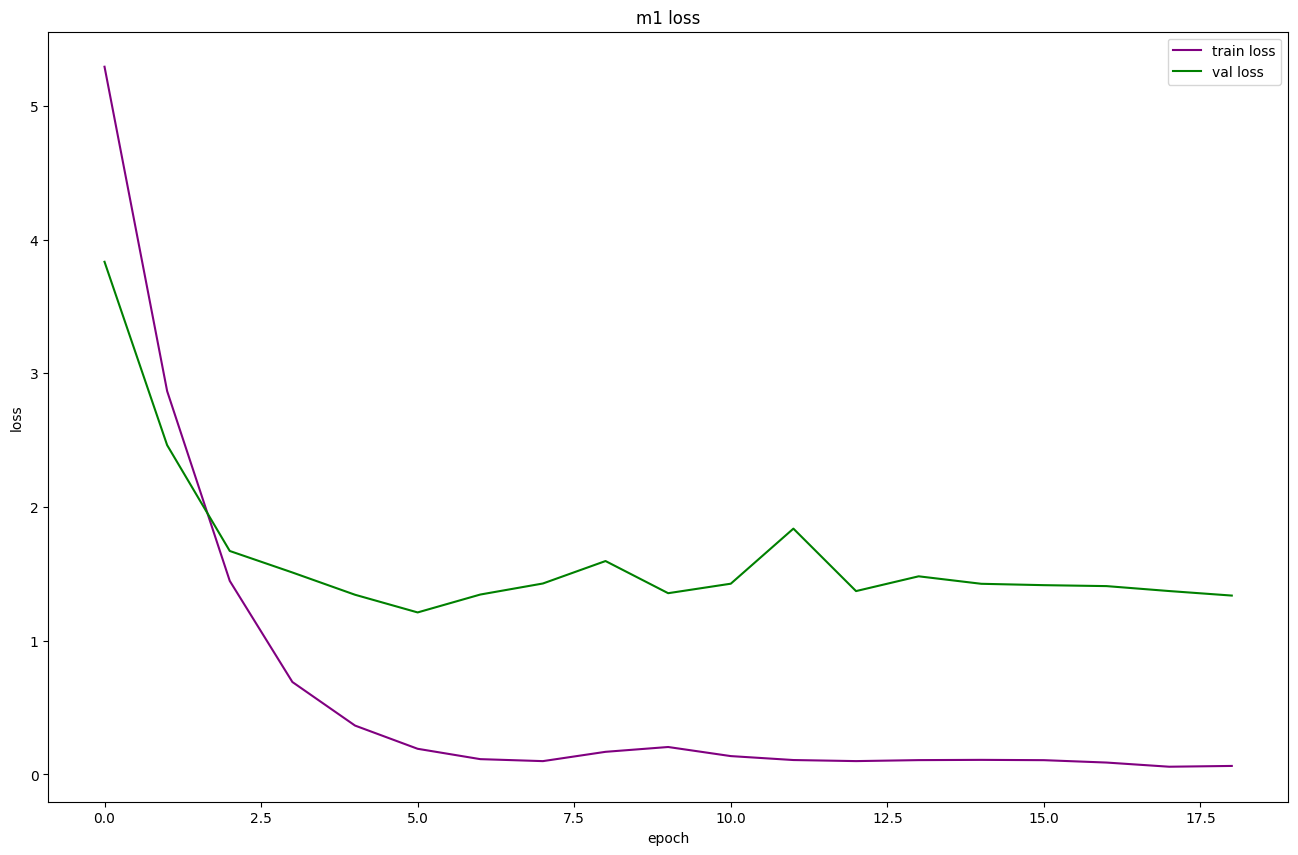

epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m1 = get_model("efficientnet_b0", weights="IMAGENET1K_V1")
m1.classifier[1] = torch.nn.Linear(in_features=1280, out_features=500, bias=True)
m1 = m1.to(device)
optimizer = torch.optim.Adam(m1.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m1.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m1(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m1.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m1(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m1.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('m1 accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('m1 loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()





In [ ]:
filename = '/content/drive/MyDrive/eff_net_param_m1.pth'
torch.save(best_state, filename)
m1.load_state_dict(torch.load(filename))
m1.eval()
loss_epoch= 0
correct = 0
with torch.no_grad():
  for data, label in test_loader:
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    outputs = m1(data)

    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()
correct/len(test_dataset)

0.7300188797986155

#MODEL 2 RegNet_Y_16GF_Weights.IMAGENET1K_SWAG_E2E_V1

In [ ]:
#RegNet_Y_16GF_Weights.IMAGENET1K_SWAG_E2E_V1

epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m2 = get_model("regnet_y_16gf", weights="IMAGENET1K_SWAG_E2E_V1")
m2.classifier[1] = torch.nn.Linear(in_features=1280, out_features=500, bias=True)
m2 = m2.to(device)
optimizer = torch.optim.Adam(m2.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m2.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m2(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m2.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m2(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m2.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('m2 accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('m2 loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()



Downloading: "https://download.pytorch.org/models/regnet_y_16gf_swag-43afe44d.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_16gf_swag-43afe44d.pth
100%|██████████| 319M/319M [00:06<00:00, 50.8MB/s]


AttributeError: 'RegNet' object has no attribute 'classifier'

In [ ]:
filename = '/content/drive/MyDrive/eff_net_param_m2.pth'
torch.save(best_state, filename)
m2.load_state_dict(torch.load(filename))
m2.eval()
loss_epoch= 0
correct = 0
with torch.no_grad():
  for data, label in test_loader:
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    outputs = m2(data)

    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()
correct/len(test_dataset)

TypeError: Expected state_dict to be dict-like, got <class 'NoneType'>.